# PID Controller Simulation

## Leaning Objectives

After completing this exercise, the student will be able to:
- Create a 1 dimentional free body diagram (`Exercise 1`)
- Create a simple model for a PID controller (`Exercise 2`)
- Numerically integrate and differentiate a signal (`Exercise 2`)
- Understanding the effects of an integration term and a derivative term on the system response (`Exercise 2`)
- (Bonus) Explore the effects of a more complex system on the PID controller response (`Exercise 3`)

## Introduction
Small drones are now a part of everything from warehouse automation to areal photography. And keeping them stable in the air is crucial to their success. Suppose we want to keep at exactly 10 meters above the grpund. This seems easy - just apply enough thrust to counteract gravity, right?

But how do we know how much thrust to apply? And what if the environment isn't still? A gust of wind could push the drone up or down, and we need to adjust the thrust accordingly. How do we do that smoothly, and without the drone oscillating up and down?

This is a problem in <a href="https://en.wikipedia.org/wiki/Control_theory">Control theory</a>, and it is solved using something callled a PID controller. PID stands for Proportional, Integral, and Derivative, and it is a type of feedback controller that adjusts the output based on the error between the desired setpoint and the actual value. It continuously adjusts the drone's thrust based on how far it is from the desired altitude, how long it has been at that altitude, and how fast the drone is moving.

In this project, we will simulate a 1-dimensional PID controller that attempts to keep a drone stable at a desired hight. We will explore how different terms in the PID controller affects the response, and see how a seemingly simple feedback loop can yield powerful control behavior.

# 1. Free Body Diagram
Before we can simulate the PID controller, we need to understand the forces acting on the drone. To do this we will create a free body diagram of the drone, to help visualize the acting forces.

Create a sketch of the system and draw a free body diagram of a hovering drone. The drone should be hovering at an arbitrary height $h$. 
Draw the acting forces into the sketch to obtain a free body diagram. We are working in 1 dimension, so we can ignore the horizontal forces. 

<span style=color:red>Should i include a hint on the free body diagram?</span> 

## 1a) Introduce setpoint, measurement and error
We can only control the Force (acceleration) of the drone, via a "gas pedal". We have constant gravitation.

## 2. Create a simulation (multi-part)


### 2a) P controller
The term "P" stands for Proportional and is proportional to the error between the desired setpoint and the actual measurement. The controller will adjust the output based on this error. We use a function $u(t)$ to represent the output of the controller, which is the thrust applied to the drone
$$u(t) = K_p e(t)$$
where $K_p$ is the proportional gain, $e(t)$ is the error at time $t$, and $u(t)$ is the control output (thrust).

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

Find an expression for the net acceleration of the drone, $a(t)$, in terms of the thrust $u(t)$ and the gravitational force $mg$.  

Fill in the following functions `calculate_error(setpoint, measurement)`, `proportional_term(K_p, error)` and `acceleration(u, m, g)` 

In [ ]:
def calculate_error(setpoint:float, measurement:float) -> float:
    """
    Calculate the error between the setpoint and the measurement.

    Parameters
    ----------
    setpoint: float
        Desired value.
    measurement: float
        Current system state.

    Returns
    -------
    error: float 
        The difference between setpoint and measurement.
    """
    return ...

def proportional_term(k_p:float, error:float) -> float:
    """
    Proportional term for a PID controller.

    Parameters
    ----------
    k_p: float
        Proportional gain.
    error: float
        The error value.

    Returns
    -------
    P: float 
        Control force based on proportional error.
    """
    return ...


def acceleration(u:float, m:float, g:float) -> float:
    """
    Calculate the net vertical acceleration of a mass under control and gravity.

    Parameters
    ----------
    u: float
        Control input (force from thrusters).
    m: float
        Mass of the drone.
    g: float
        Gravitational acceleration.

    Returns
    -------
    a: float 
        Net acceleration 
    """
    return ...

In [ ]:
## initialize the system
m = 1.0  # mass
setpoint = ... # desired position E.g 10.0
start_position = 0.0 # initial position
start_velocity = 0.0 # initial velocity
g = 9.81  # gravitational acceleration
K_p = ...  # proportional gain


n = 500
T = np.linspace(0, 20, n)  # time vector
dt = T[1] - T[0]  # time step

position = np.zeros(n)  # position
velocity = np.zeros(n)  # velocity
position[0] = start_position  # set initial position
velocity[0] = start_velocity  # set initial velocity


# Euler cromer method for numerical integration
for i in range(1, n):
    # Calculate the error between the setpoint and the current position

    # Calculate the control input using the proportional term function


    # Calculate the acceleration

    # Update velocity and position using Euler-Cromer method
    ...

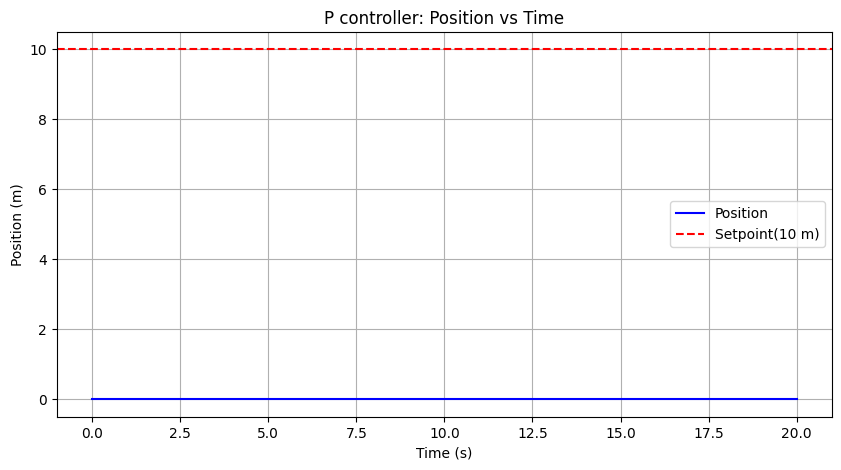

In [7]:
# plot the results
plt.figure(figsize=(10, 5))
plt.plot(T, position, label='Position', color='blue')
plt.axhline(setpoint, color='red', linestyle='--', label=f'Setpoint({setpoint} m)')
plt.title('P controller: Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid()
plt.show()    

### 2b) PD controller
Signal proportional to error + derivative of error
$$u(t) = K_p e(t) + K_D \frac{∂ e(t)}{∂ t}$$
Implement the derivative of the error into the simulation.
A simple way of calculating the derivative is to use the difference between the current and previous error:
$$\frac{∂ e(t)}{∂ t} = \frac{e(t) - e(t-1)}{Δt}$$

In [57]:
def derivative_term(K_d, current_error, previous_error, dt):
    """
    Derivative term for a PID controller.

    Parameters:
    K_d (float): Derivative gain.
    current_error (float): Current error.
    previous_error (float): Previous error.
    dt (float): Time step.

    Returns:
    float: Control force based on derivative of error.
    """
    derivative = (current_error - previous_error) / dt
    return K_d * derivative

In [65]:
K_p = 10.0  # proportional gain
K_d = 5.0  # derivative gain

position = np.zeros(n)  # position
velocity = np.zeros(n)  # velocity
position[0] = start_position  # set initial position
velocity[0] = start_velocity  # set initial velocity

previous_error = calculate_error(setpoint, position[0])  # initialize previous error

for i in range(1, n):
    error = calculate_error(setpoint, position[i-1])  # calculate error

    # Calculate the control input using the proportional term
    u = proportional_term(K_p, error)

    # Calculate the derivative term
    derivative = derivative_term(K_d, error, previous_error, dt)

    u += derivative  # add derivative term to control input

    # Calculate the acceleration
    a = acceleration(u, m, g)

    # Update velocity and position using Euler-Cromer method
    velocity[i] = velocity[i-1] + a * dt
    position[i] = position[i-1] + velocity[i] * dt

    previous_error = error  # update previous error for next iteration

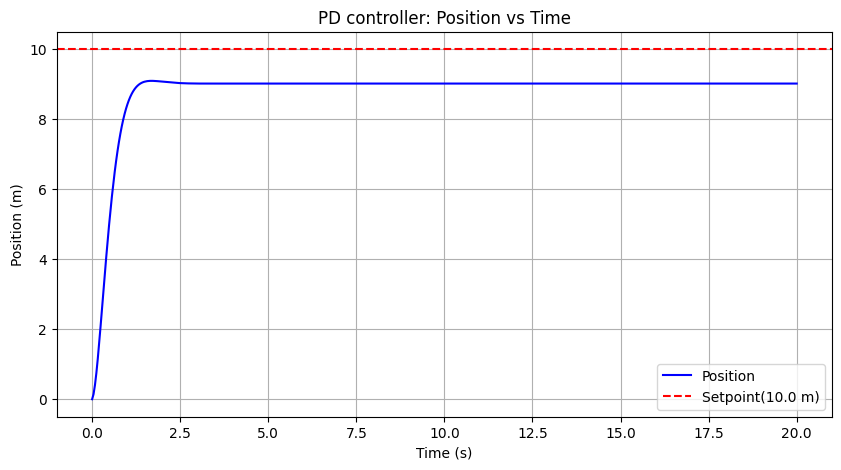

In [66]:
# plot the results
plt.figure(figsize=(10, 5))
plt.plot(T, position, label='Position', color='blue')
plt.axhline(setpoint, color='red', linestyle='--', label=f'Setpoint({setpoint} m)')
plt.title('PD controller: Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid()
plt.show()    

### 2C) PID controller
Now its time to introduce the final term of the controlller, the integral term.
$$u(t) = K_p e(t) + K_I \int_0^t e(t) dt + K_D \frac{∂ e(t)}{∂ t} $$
Implement the integral of the error into the simulation by using a simple numerical integration method, such as a Riemann sum:
$$\int_0^t e(t) dt \approx \sum_{i=0}^{n} e(t_i) \Delta t$$

In [67]:
def integration_term(K_i, accumulated_error, dt):
    """
    Integral term for a PID controller.

    Parameters:
    K_i (float): Integral gain.
    accumulated_error (float): Accumulated error over time.
    dt (float): Time step.

    Returns:
    float: Control force based on integral of error.
    """
    return K_i * accumulated_error * dt

In [79]:
K_p = 10.0  # proportional gain
K_d = 5.0   # derivative gain
K_i = 5.0  # integral gain

position = np.zeros(n)  # position
velocity = np.zeros(n)  # velocity
position[0] = start_position  # set initial position
velocity[0] = start_velocity  # set initial velocity

previous_error = calculate_error(setpoint, position[0])  # initialize previous error
accumulated_error = previous_error

for i in range(1, n):
    # Calculate the error
    error = calculate_error(setpoint, position[i-1])
    # Update accumulated error for integral term
    accumulated_error += error

    # Calculate the control input using the proportional term
    u = proportional_term(K_p, error)

    # Calculate the derivative term
    derivative = derivative_term(K_d, error, previous_error, dt)

    # Calculate the integral term
    integral = integration_term(K_i, accumulated_error, dt)

    u = u + derivative + integral  # add derivative and integral terms to control input

    # Calculate the acceleration
    a = acceleration(u, m, g)

    # Update velocity and position using Euler-Cromer method
    velocity[i] = velocity[i-1] + a * dt
    position[i] = position[i-1] + velocity[i] * dt

    previous_error = error  # update previous error for next iteration

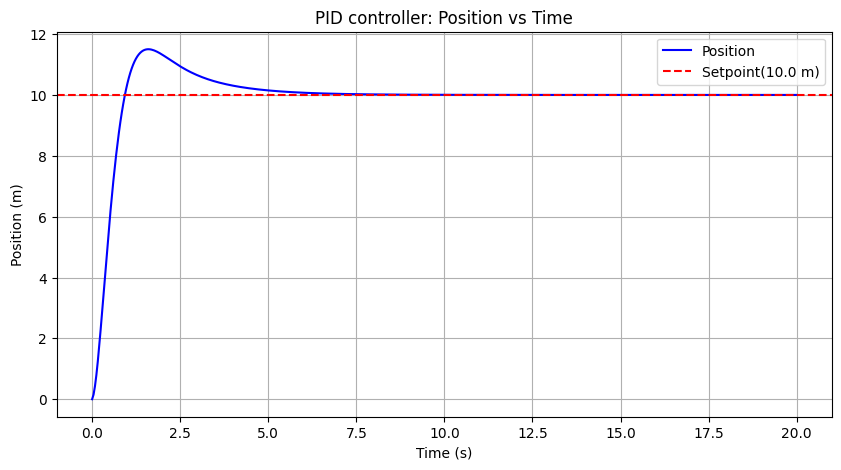

In [80]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(T, position, label='Position', color='blue')
plt.axhline(setpoint, color='red', linestyle='--', label=f'Setpoint({setpoint} m)')
plt.title('PID controller: Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid()
plt.show()

## 3. Add random effects
### Examples: 
- Wind gusts
- Air resistance
- Moving setpoint

In [91]:
def drag_force(v, drag_coeff=5):
    """
    Calculate the drag force acting on the object.

    Parameters:
    v (float): Current velocity of the object.
    drag_coeff (float): Coefficient of drag.

    Returns:
    float: Drag force acting on the object.
    """
    return -drag_coeff * v

def wind_force(wind_amplitude=5):
    """
    Calculate the wind force acting on the object.

    Parameters:
    t (float): Current time.
    wind_amplitude (float): Amplitude of the wind force.

    Returns:
    float: Wind force acting on the object.
    """
    return np.random.uniform(-wind_amplitude, wind_amplitude)


In [102]:


K_p = 10.0  # proportional gain
K_d = 10.0   # derivative gain
K_i = 10.0   # integral gain

# Simulate the system with external forces
position = np.zeros(n)  # position
velocity = np.zeros(n)  # velocity
position[0] = start_position  # set initial position
velocity[0] = start_velocity  # set initial velocity


previous_error = calculate_error(setpoint, position[0])  # initialize previous error
accumulated_error = previous_error

for i in range(1, n):
    # Calculate the error
    error = calculate_error(setpoint, position[i-1])
    # Update accumulated error for integral term
    accumulated_error += error

    # Calculate the control input using the proportional term
    u = proportional_term(K_p, error)

    # Calculate the derivative term
    derivative = derivative_term(K_d, error, previous_error, dt)

    # Calculate the integral term
    integral = integration_term(K_i, accumulated_error, dt)

    u = u + derivative + integral  # add derivative and integral terms to control input

    # Calculate the acceleration
    a = acceleration(u, m, g)
    a += (wind_force(wind_amplitude=5) + drag_force(velocity[i-1], drag_coeff=1))  / m  # add external forces

    # Update velocity and position using Euler-Cromer method
    velocity[i] = velocity[i-1] + a * dt
    position[i] = position[i-1] + velocity[i] * dt

    previous_error = error  # update previous error for next iteration

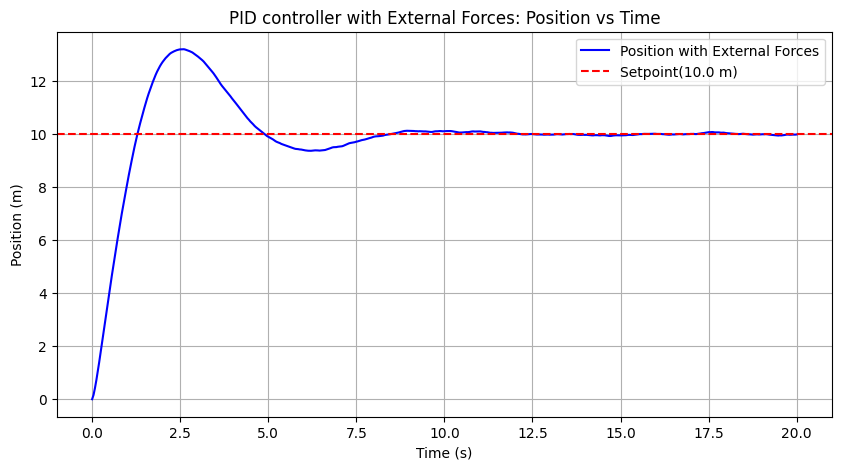

In [103]:
plt.figure(figsize=(10, 5))
plt.plot(T, position, label='Position with External Forces', color='blue')
plt.axhline(setpoint, color='red', linestyle='--', label=f'Setpoint({setpoint} m)')
plt.title('PID controller with External Forces: Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid()
plt.show()

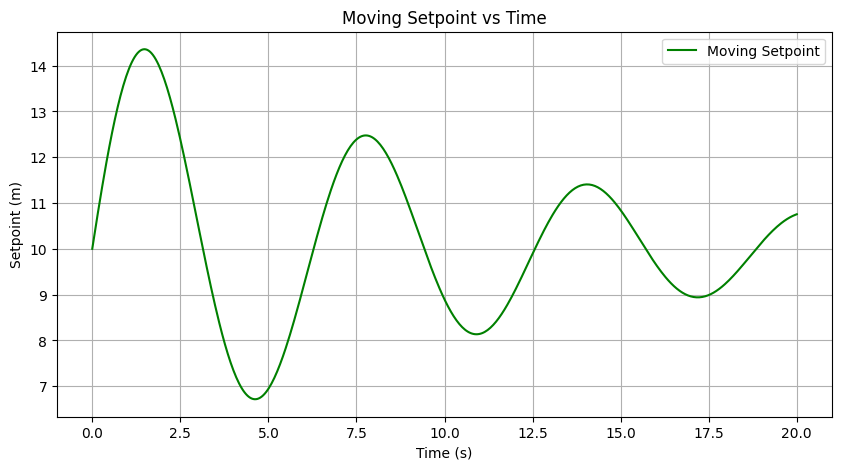

In [114]:
## Moving setpoint
def moving_setpoint(t):
    """
    Define a moving setpoint that changes over time.

    Parameters:
    t (float): Current time.

    Returns:
    float: Setpoint value at time t.
    """
    return 10.0 + 5.0 * np.sin(1.0 * t) * np.exp(-0.09 * t)

#plot the moving setpoint
moving_setpoints = moving_setpoint(T)
plt.figure(figsize=(10, 5))
plt.plot(T, moving_setpoints, label='Moving Setpoint', color='green')
plt.title('Moving Setpoint vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Setpoint (m)')
plt.legend()
plt.grid()
plt.show()

In [122]:


K_p = 10.0  # proportional gain
K_d = 10.0   # derivative gain
K_i = 10.0   # integral gain

# Simulate the system with external forces
position = np.zeros(n)  # position
velocity = np.zeros(n)  # velocity
position[0] = start_position  # set initial position
velocity[0] = start_velocity  # set initial velocity


previous_error = calculate_error(moving_setpoints[0], position[0])  # initialize previous error
accumulated_error = previous_error

for i in range(1, n):
    # Calculate the error
    error = calculate_error(moving_setpoints[i], position[i-1])
    # Update accumulated error for integral term
    accumulated_error += error

    # Calculate the control input using the proportional term
    u = proportional_term(K_p, error)

    # Calculate the derivative term
    derivative = derivative_term(K_d, error, previous_error, dt)

    # Calculate the integral term
    integral = integration_term(K_i, accumulated_error, dt)

    u = u + derivative + integral  # add derivative and integral terms to control input

    # Calculate the acceleration
    a = acceleration(u, m, g)
    a += (wind_force(wind_amplitude=5) + drag_force(velocity[i-1], drag_coeff=1))  / m  # add external forces

    # Update velocity and position using Euler-Cromer method
    velocity[i] = velocity[i-1] + a * dt
    position[i] = position[i-1] + velocity[i] * dt

    previous_error = error  # update previous error for next iteration

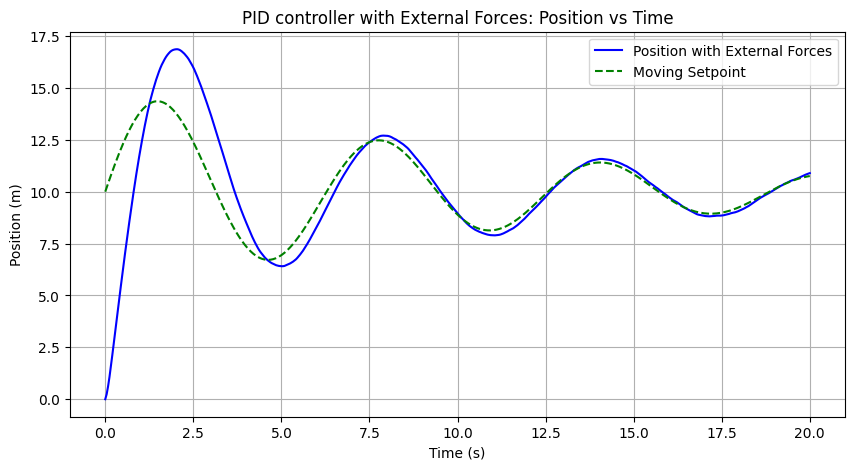

In [123]:
plt.figure(figsize=(10, 5))
plt.plot(T, position, label='Position with External Forces', color='blue')
plt.plot(T, moving_setpoints, label='Moving Setpoint', color='green', linestyle='--')
plt.title('PID controller with External Forces: Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid()
plt.show()